<a href="https://colab.research.google.com/github/neha-sharma4/ML_Lab/blob/main/Lasso_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Linear Regression Results:
R2 Score: 0.7546
RMSE: 2.2433


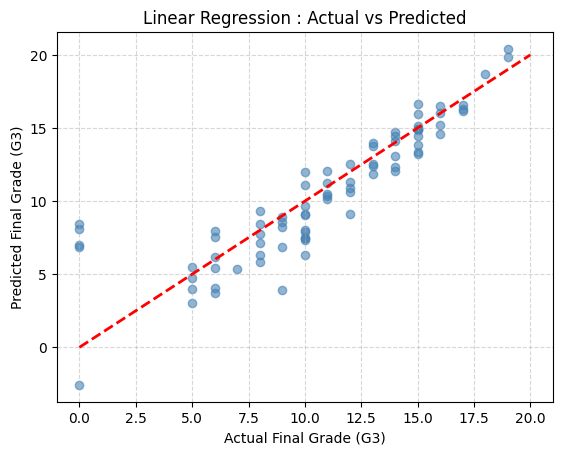


Ridge Regression Results:
R2 Score: 0.7549
RMSE: 2.2419


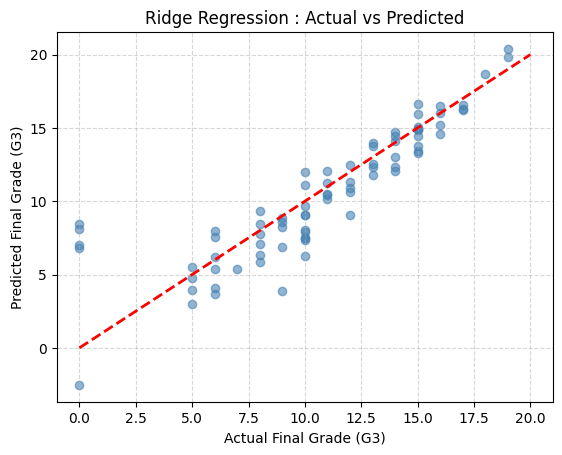


Lasso Regression Results:
R2 Score: 0.778
RMSE: 2.1336


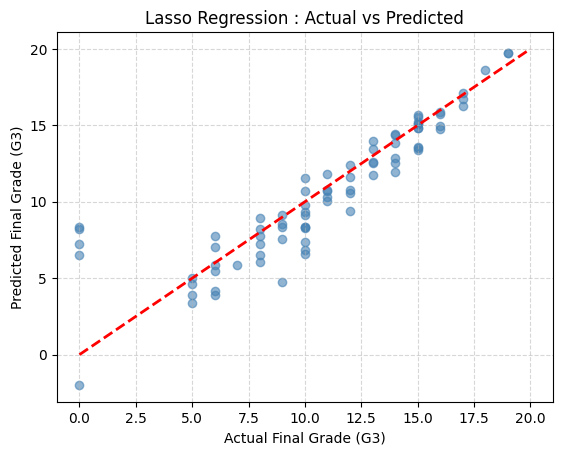

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset (Math class)
df = pd.read_csv("student-mat.csv", sep=';')

# Target: Final Grade (G3)
y = df["G3"]

# Drop target and irrelevant columns
X = df.drop(["G3"], axis=1)

# Encode categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Train, evaluate & visualize
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results:")
    print("R2 Score:", round(r2_score(y_test, y_pred), 4))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))

    # Plot Actual vs Predicted
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.6, color='steelblue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel("Actual Final Grade (G3)")
    plt.ylabel("Predicted Final Grade (G3)")
    plt.title(f"{name} : Actual vs Predicted")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
